# The Sparks Foundation: Internship Program
### GRIP
## Name: Yaswanth Teja Yarlagada
## Data Science & Business Analytics Intern at The Sparks Foundation

# Task 6: Prediction using Decision Tree Algorithm

## *Create the Decision Tree classifier and visualize it graphically*

## Table of contents:

1. Problem statement
2. About the dataset
3. Exploratory Data Analysis on data
4. Train- test split and model preparation
5. Predicting the class of a sample datapoint
6. Visualizing the decision tree classifier graphically
7. Conclusion

## 1. Problem statement:

The aim of this task is to create a decision tree classifier model and visualize it graphically and The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [28]:
# importing all neccassary files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. About the dataset:

The dataset is about the iris flower and its species, the data contains total five features where sepal length, sepal width, petal width, petal length are independent features and species is dependent and categorical feature of dataset.

Data link: https://bit.ly/3kXTdox

In [29]:
# importing the data
iris = pd.read_csv('iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## 3. Exploratory Data Analysis on data:

In [30]:
# checking the diamensions of data
iris.shape

(150, 6)

In [31]:
# checking the number of features in data
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
# removing the inessential features
iris_1 = iris.drop(['Id'], axis= 1)

# Viewing the data
iris_1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
# Checking for the null values if any in given feature
print(iris_1.isnull().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


From above, no null values present in the rows of the data.

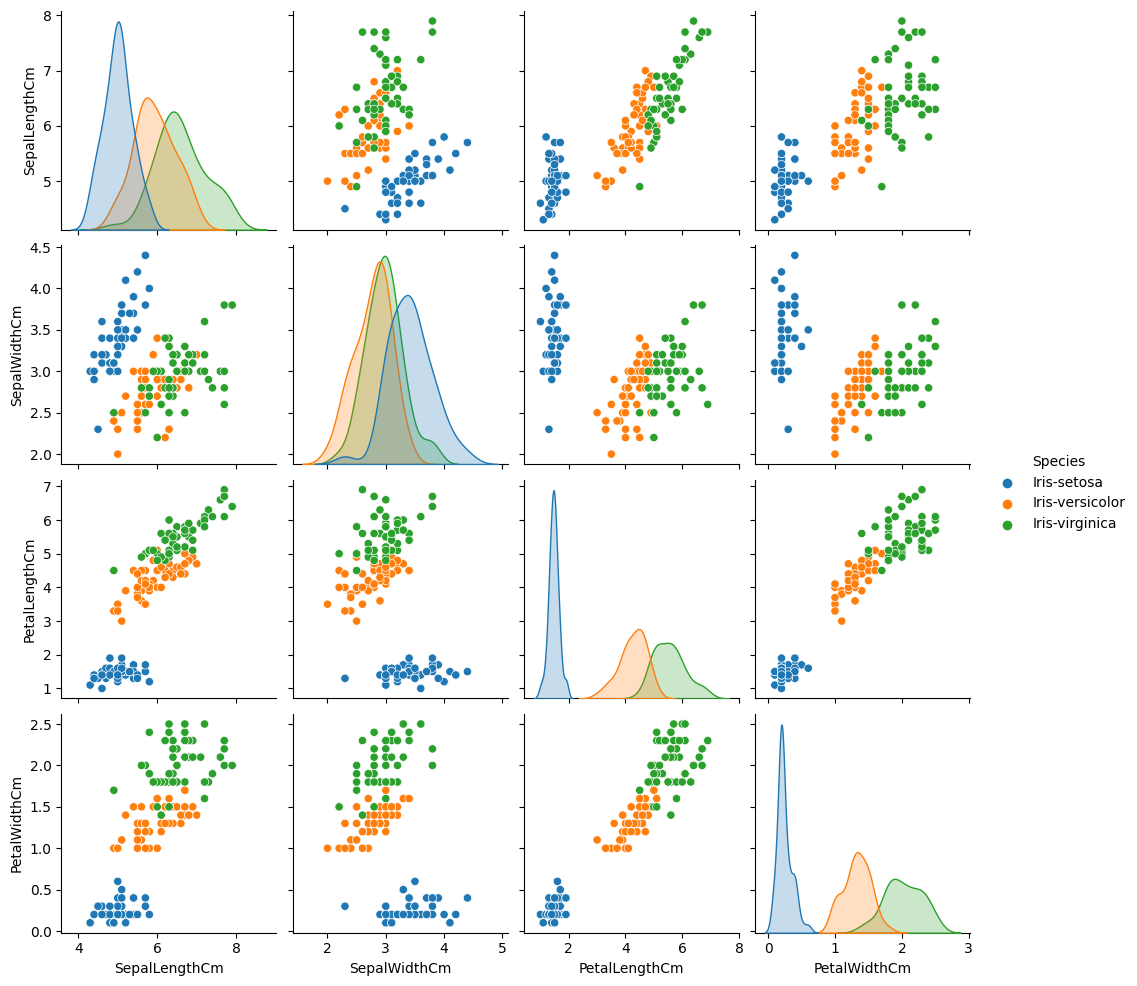

In [32]:
# Plotting a pair plot for more visualization
sns.pairplot(iris_1,hue='Species')
plt.show()

Form above pair plot, we can see that setosa is well seperated from other two clusters versicolor and viginica. The two versicolor and virginica are sightly merged in each other, here petal length and petal width are perfect feature which can be used in decision tree algorithum.

## 4. Train- test split and model preparation:

In [33]:
# Spliting the data into train and test
from sklearn.model_selection import train_test_split

# independent and dependent variable
X = iris_1.iloc[:, 0:-1]
y = iris_1.iloc[:, 4]

In [9]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [12]:
X_train.shape

(112, 4)

In [13]:
y_train.shape

(112,)

## Importing the model

In [14]:
# Importing the model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Defining a variable for decision tree
iris_classifier = tree.DecisionTreeClassifier(criterion= 'entropy', random_state= 0)

# fitting the model
iris_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Now our model is trained and ready to use and predict the samples.

In [15]:
# checking the mean accuracy of the model
iris_classifier.score(X_test, y_test)

0.9473684210526315

## 5. Predicting the class of a sample datapoint:

In [16]:
# Creating a test prediction variable and testing it
tree_test_predict = pd.DataFrame({"Actual": y_test, "Predicted": iris_classifier.predict(X_test)})


In [17]:
# Checking results
tree_test_predict.sample(n=10)

,Actual,Predicted
88,Iris-versicolor,Iris-versicolor
73,Iris-versicolor,Iris-versicolor
10,Iris-setosa,Iris-setosa
89,Iris-versicolor,Iris-versicolor
19,Iris-setosa,Iris-setosa
131,Iris-virginica,Iris-virginica
130,Iris-virginica,Iris-virginica
55,Iris-versicolor,Iris-versicolor
50,Iris-versicolor,Iris-versicolor
124,Iris-virginica,Iris-virginica


In [ ]:
# Predicting the class of a sample
# 's' is sample for which we want to predict its class
s = np.array([5.8, 3.5, 2.4, 1.50], ndmin = 2)
iris_classifier.predict(s)

## 6. Visualizing the decision tree classifier graphically:

[Text(0.375, 0.95, 'PetalWidthCm <= 0.75\nentropy = 1.584\nsamples = 112\nvalue = [39, 36, 37]'),
 Text(0.25, 0.85, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.85, 'PetalLengthCm <= 4.75\nentropy = 1.0\nsamples = 73\nvalue = [0, 36, 37]'),
 Text(0.25, 0.75, 'PetalWidthCm <= 1.65\nentropy = 0.196\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.125, 0.65, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.375, 0.65, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.75, 'PetalWidthCm <= 1.85\nentropy = 0.469\nsamples = 40\nvalue = [0, 4, 36]'),
 Text(0.625, 0.65, 'PetalLengthCm <= 5.3\nentropy = 0.811\nsamples = 16\nvalue = [0, 4, 12]'),
 Text(0.5, 0.55, 'SepalLengthCm <= 6.5\nentropy = 0.971\nsamples = 10\nvalue = [0, 4, 6]'),
 Text(0.375, 0.45, 'SepalLengthCm <= 6.05\nentropy = 0.811\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(0.25, 0.35, 'PetalWidthCm <= 1.55\nentropy = 1.0\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(0.125, 0.25, 'entropy = 0.0\nsampl

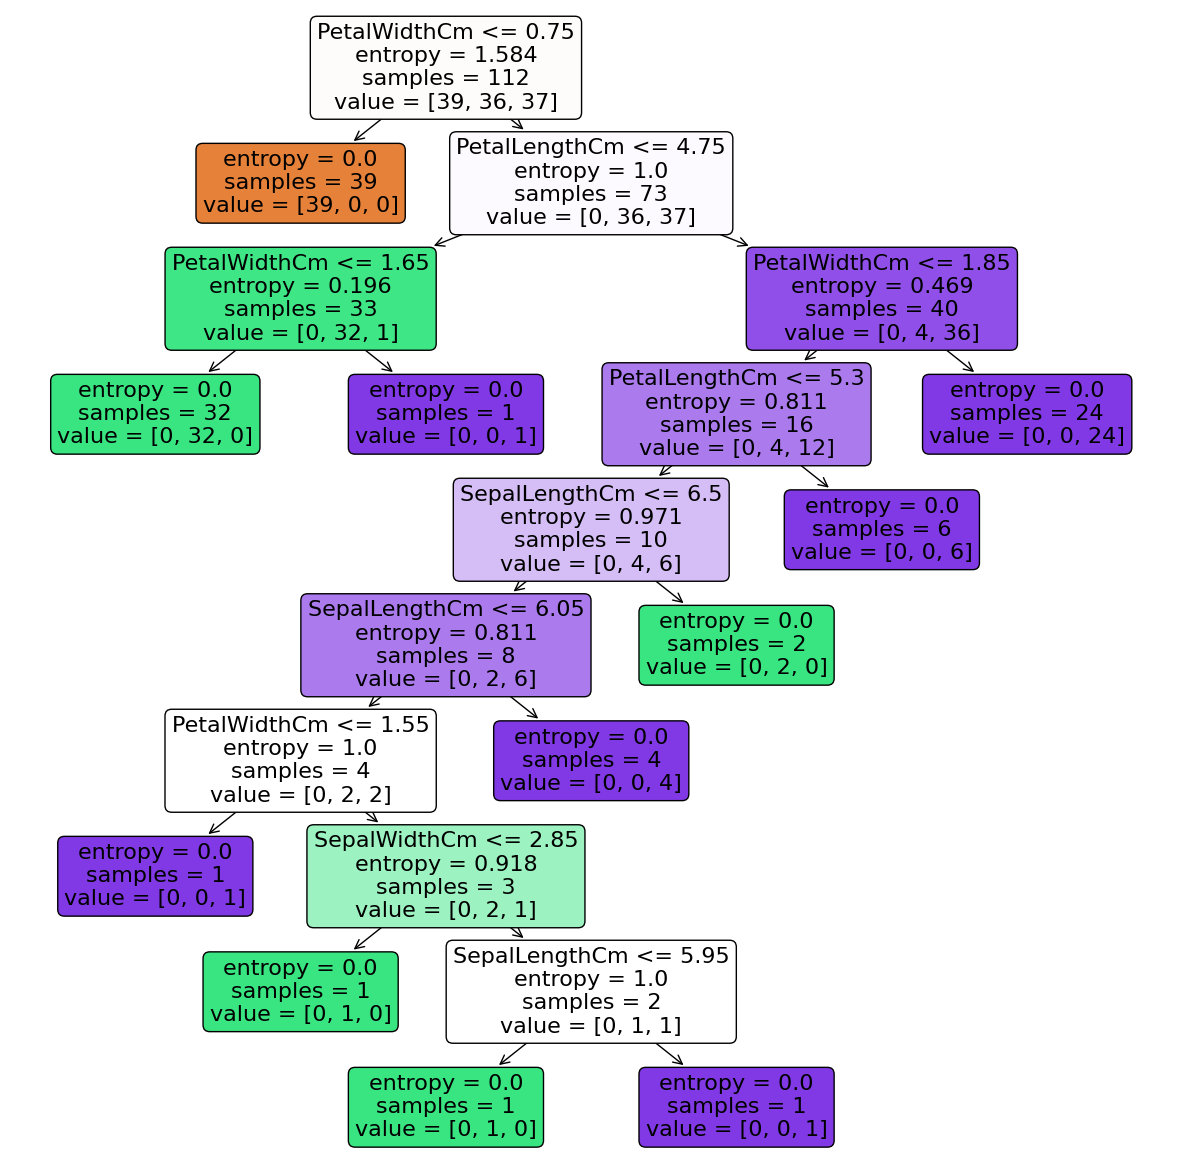

In [34]:
# Visualizing the decision tree graphically
plt.figure(figsize= (15, 15))
cols=list(X.columns.values)
tree.plot_tree(iris_classifier, filled= True, rounded= True, feature_names=cols)

## Conclusion:

I have successfully created a decision tree classifier model which can predict the class with great accuracy and visualized the graph of decision tree properly.

# Thank You